### Package

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

### Real data from sakila.db

In [46]:
conn = sqlite3.connect('sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [47]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


### Data info

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [49]:
df.shape

(16044, 10)

In [50]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [51]:
df.describe()

,rental_date,return_date,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044,15861,16044.000000,16044.00000,16044.000000,16044.000000
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549,2.942630,20.215443
min,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000,0.990000,9.990000
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000,0.990000,14.990000
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000,2.990000,20.990000
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000,4.990000,25.990000
max,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000,4.990000,29.990000
std,NaN,NaN,0.499978,1.40169,1.649678,6.081771


### Most common film rental duration

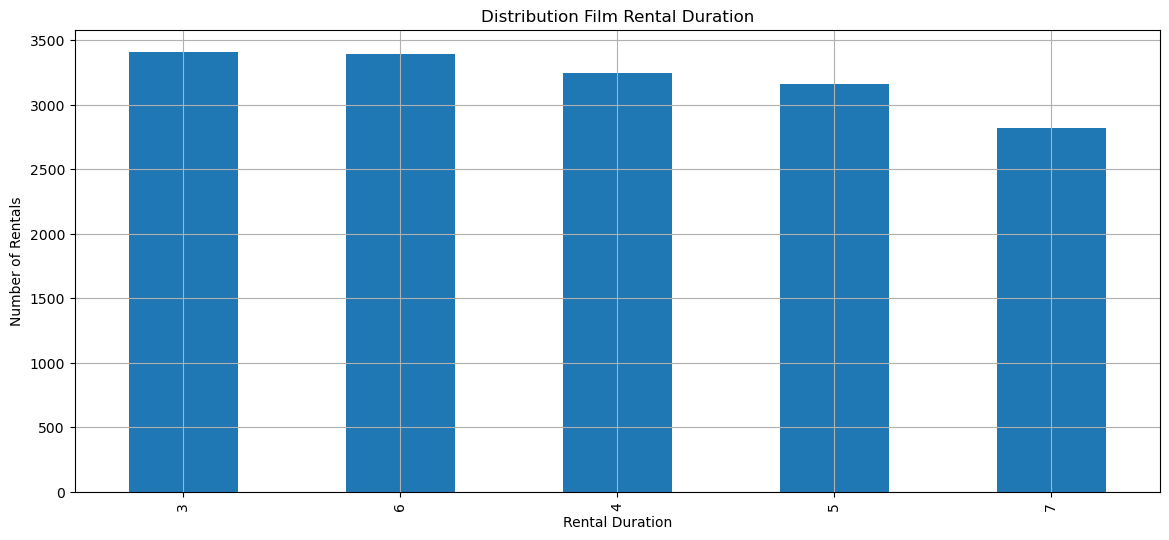

In [52]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel("Rental Duration")
plt.ylabel("Number of Rentals")
plt.title("Distribution Film Rental Duration")
plt.grid()
plt.show()

### Rental rate

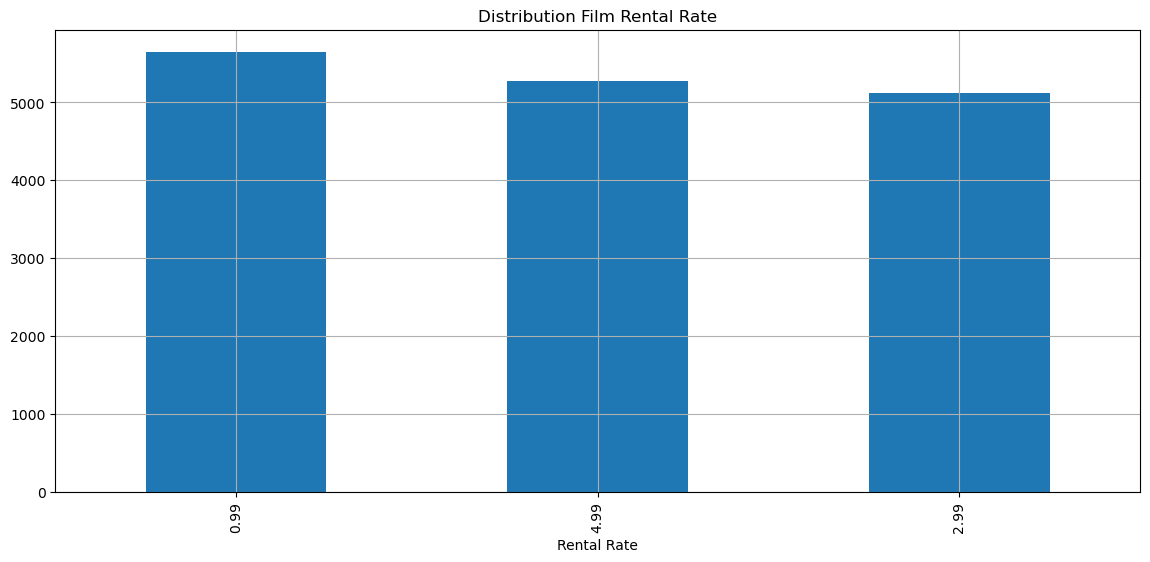

In [53]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel("Rental Rate")
plt.ylabel("")
plt.title("Distribution Film Rental Rate")
plt.grid()
plt.show()

### Replacement cost distributed
- Boxplot of the replacement costs.
- Density plot of the replacement costs.
- Red line on the mean.
- Green line on the median median.

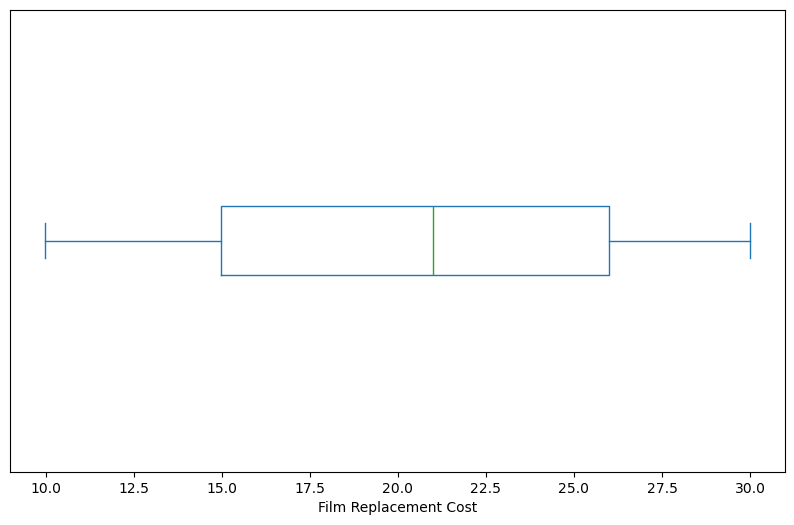

In [54]:
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(10,6))
plt.xlabel("Film Replacement Cost")
plt.yticks([])
plt.show()

### Density plot film_replacement_cost

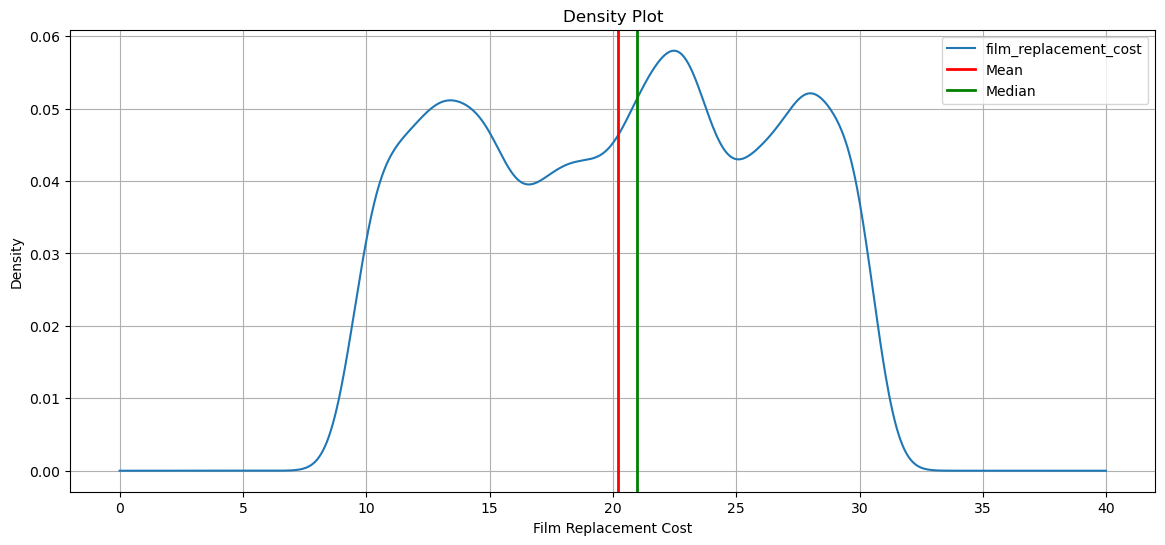

In [55]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='Red', linestyle='-', linewidth=2, label='Mean')
ax.axvline(df['film_replacement_cost'].median(), color='Green', linestyle='-', linewidth=2, label='Median')
plt.xlabel("Film Replacement Cost")
plt.ylabel("Density")
plt.title("Density Plot")
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Films of each rating
- Raw count of each film rating.
- Bar plot with all possible film ratings.

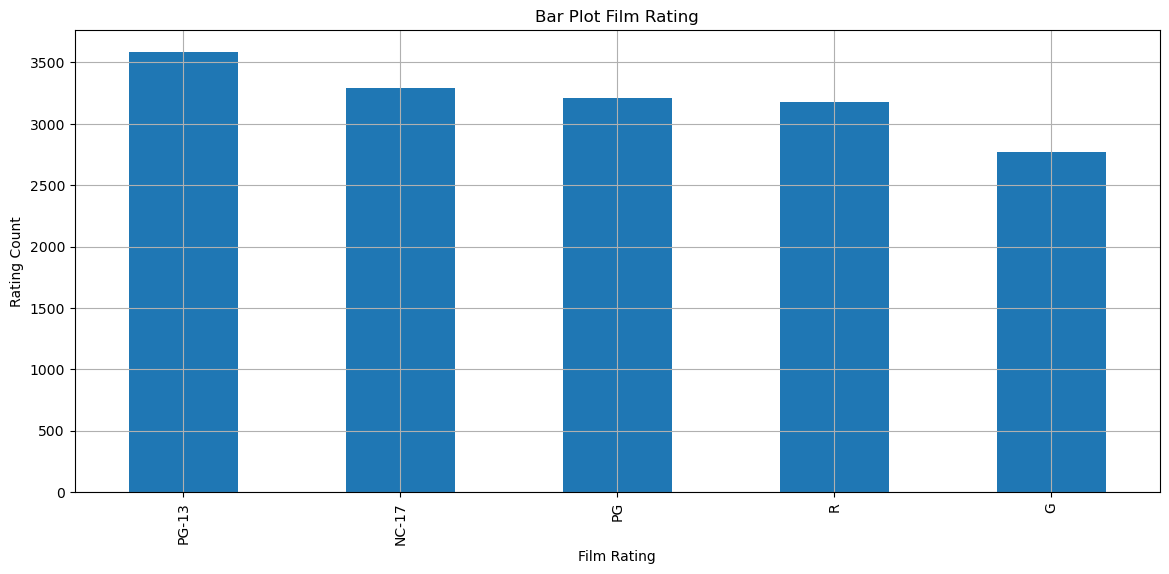

In [56]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel("Film Rating")
plt.ylabel("Rating Count")
plt.title("Bar Plot Film Rating")
plt.grid()
plt.show()

### Film replacement cost vary depending on film rating

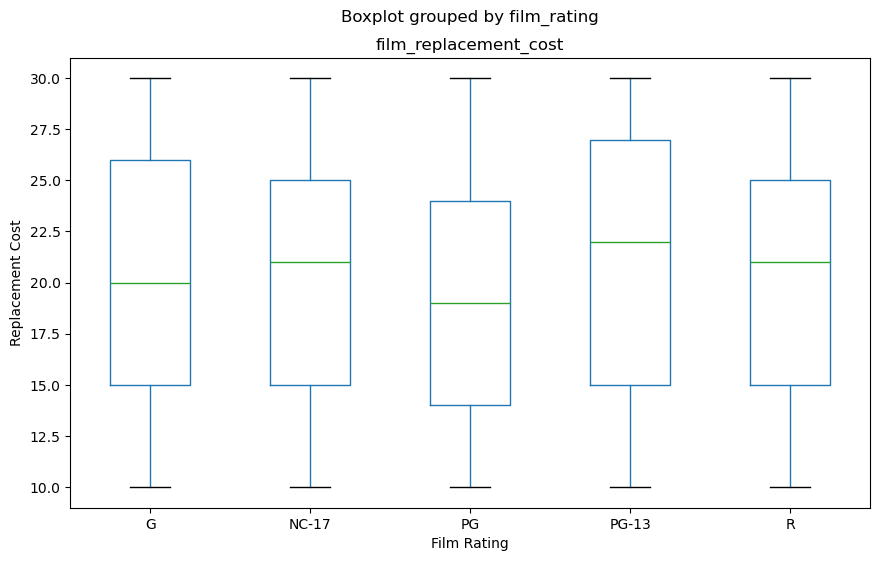

In [57]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(10,6))
plt.xlabel("Film Rating")
plt.ylabel("Replacement Cost")
plt.grid()
plt.show()

### Adding and calculate a new rental_days column

In [58]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
df['rental_days'].head()

/var/folders/2r/ht33x8dn3qj7nxtm10ns69p80000gn/T/ipykernel_1041/1039625861.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)


rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

### Analyze the distribution of rental_days
- Calculate the mean of rental_days.
- Density (KDE) of rental_days.

In [59]:
df['rental_days'].mean()

4.525944139713763

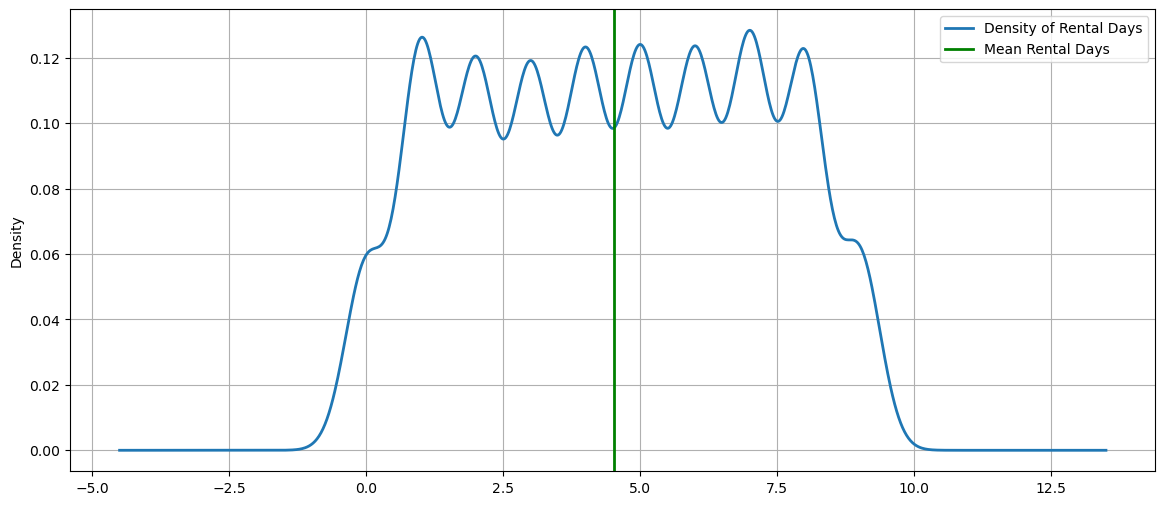

In [60]:
axd = df['rental_days'].plot(kind='density', figsize=(14,6), linestyle='-', linewidth=2, label='Density of Rental Days')
axd.axvline(df['rental_days'].mean(), color='green', linestyle='-', linewidth=2, label='Mean Rental Days')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### Adding and calculate a new film_daily_rental_rate column
- Division of film_rental_rate by film_rental_duration
- Calculate the mean of film_daily_rental_rate
- Density plot (KDE) of film_daily_rental_rate

In [61]:
df['film_daily_rental_rate'] = df['film_rental_rate']/df['film_rental_duration']
df['film_daily_rental_rate']

rental_id
1        0.427143
2        0.427143
3        0.427143
4        0.165000
5        0.598000
           ...   
16045    0.198000
16046    0.165000
16047    0.247500
16048    1.247500
16049    0.247500
Name: film_daily_rental_rate, Length: 16044, dtype: float64

In [62]:
df['film_daily_rental_rate'].mean()

0.6458262471655329

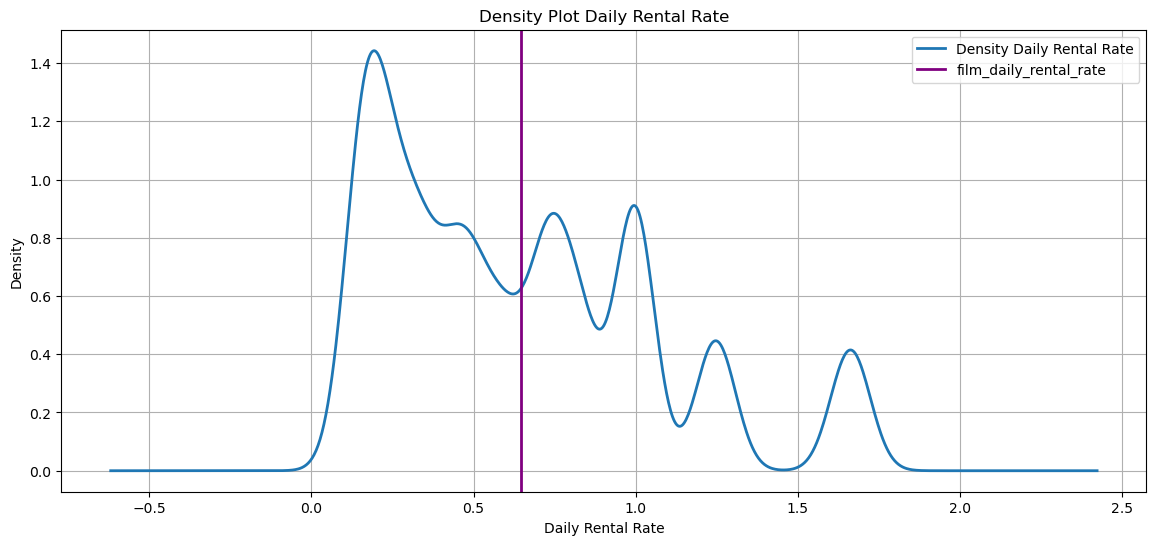

In [63]:
axr = df['film_daily_rental_rate'].plot(kind='kde', figsize=(14,6), linewidth=2, linestyle='-', label='Density Daily Rental Rate')
axr.axvline(df['film_daily_rental_rate'].mean(), color='purple', linewidth=2, linestyle='-', label='film_daily_rental_rate')
plt.xlabel("Daily Rental Rate")
plt.ylabel("Density")
plt.title("Density Plot Daily Rental Rate")
plt.legend(loc='upper right')
plt.grid()
plt.show()

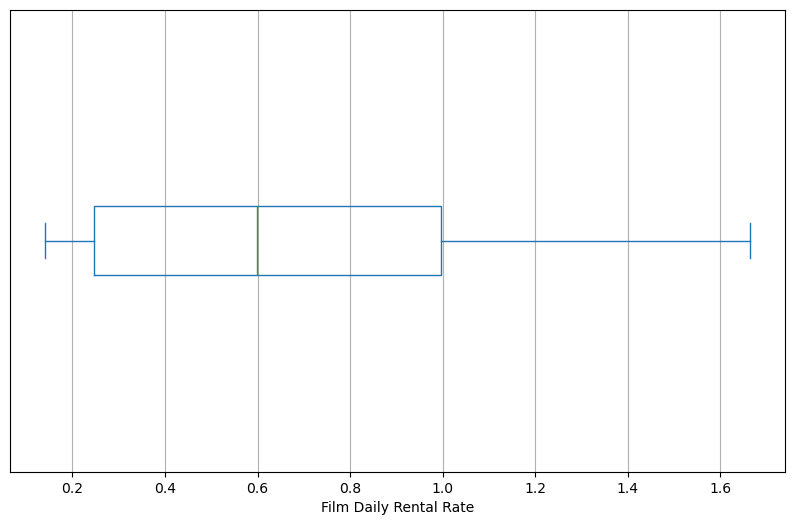

In [64]:
df['film_daily_rental_rate'].plot(kind='box', vert=False, figsize=(10,6))
plt.xlabel("Film Daily Rental Rate")
plt.yticks([])
plt.grid()
plt.show()

### 10 films with the lowest daily rental rate

In [66]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.0,0.141429


### 10 films with the highest daily rental rate

In [82]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,1.663333


### Rentals were made in Lethbridge city
- Rentals of each film rating were made in Lethbridge city and barplot each film rating count 
- Rentals were made in Woodridge city with rental duration higher than 5 days
- Rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD

In [68]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

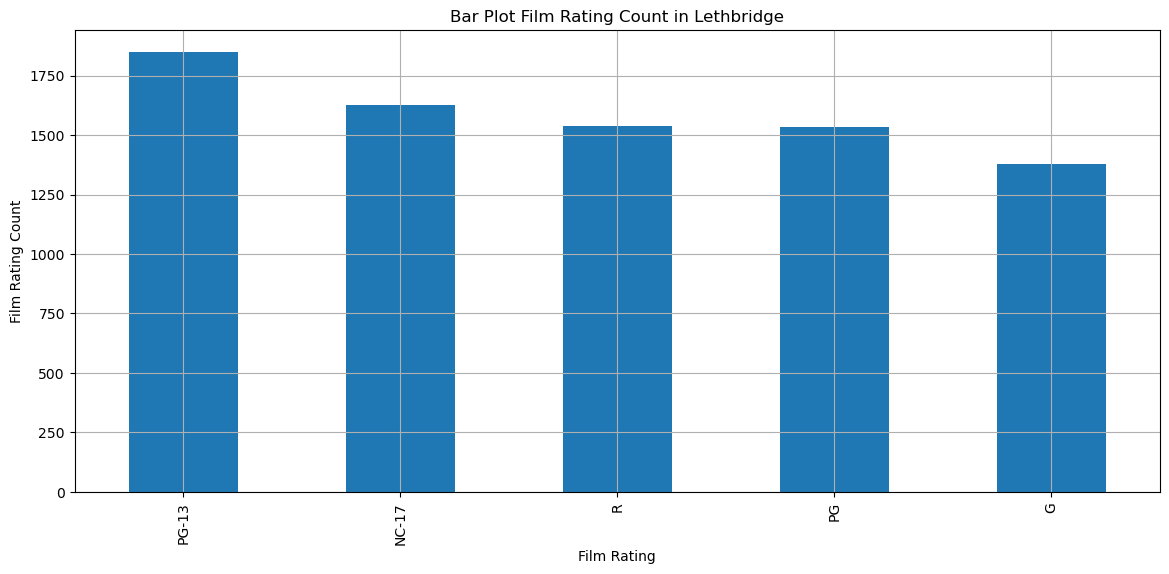

In [93]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))
plt.xlabel("Film Rating")
plt.ylabel("Film Rating Count")
plt.title("Bar Plot Film Rating Count in Lethbridge")
plt.grid()
plt.show()

In [75]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
14,2005-05-25 00:31:15,2005-05-26 02:56:15,CULP,2,Woodridge,MONTEREY LABYRINTH,6,0.99,13.99,G,1.0,0.165000
17,2005-05-25 01:06:36,2005-05-27 00:43:36,OGLESBY,2,Woodridge,CONTACT ANONYMOUS,7,2.99,10.99,PG-13,1.0,0.427143
19,2005-05-25 01:17:24,2005-05-31 06:00:24,RICKETTS,2,Woodridge,HOLLOW JEOPARDY,7,4.99,25.99,NC-17,6.0,0.712857
...,...,...,...,...,...,...,...,...,...,...,...,...
16025,2005-08-23 21:48:54,2005-08-24 22:05:54,GARDINER,2,Woodridge,GROUNDHOG UNCUT,6,4.99,26.99,PG-13,1.0,0.831667
16029,2005-08-23 21:54:02,2005-08-29 23:55:02,GORDON,2,Woodridge,DARN FORRESTER,7,4.99,14.99,G,6.0,0.712857
16035,2005-08-23 22:08:04,2005-08-28 03:46:04,BAKER,2,Woodridge,CAPER MOTIONS,6,0.99,22.99,G,4.0,0.165000


### Rentals were made in Woodridge city with rental duration higher than 5 days

In [98]:
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
14,2005-05-25 00:31:15,2005-05-26 02:56:15,CULP,2,Woodridge,MONTEREY LABYRINTH,6,0.99,13.99,G,1.0,0.165000
17,2005-05-25 01:06:36,2005-05-27 00:43:36,OGLESBY,2,Woodridge,CONTACT ANONYMOUS,7,2.99,10.99,PG-13,1.0,0.427143
19,2005-05-25 01:17:24,2005-05-31 06:00:24,RICKETTS,2,Woodridge,HOLLOW JEOPARDY,7,4.99,25.99,NC-17,6.0,0.712857
...,...,...,...,...,...,...,...,...,...,...,...,...
16025,2005-08-23 21:48:54,2005-08-24 22:05:54,GARDINER,2,Woodridge,GROUNDHOG UNCUT,6,4.99,26.99,PG-13,1.0,0.831667
16029,2005-08-23 21:54:02,2005-08-29 23:55:02,GORDON,2,Woodridge,DARN FORRESTER,7,4.99,14.99,G,6.0,0.712857
16035,2005-08-23 22:08:04,2005-08-28 03:46:04,BAKER,2,Woodridge,CAPER MOTIONS,6,0.99,22.99,G,4.0,0.165000


### Rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD

In [107]:
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0,0.427143
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0,0.427143
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0,0.598000
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13,4.0,0.247500
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13,3.0,0.831667
...,...,...,...,...,...,...,...,...,...,...,...,...
16042,2005-08-23 22:20:40,2005-08-24 17:54:40,HICKS,2,Woodridge,CHARADE DUFFEL,3,2.99,21.99,PG,0.0,0.996667
16043,2005-08-23 22:21:03,2005-08-31 03:09:03,SEAL,1,Lethbridge,STING PERSONAL,3,4.99,9.99,NC-17,7.0,1.663333
16046,2005-08-23 22:26:47,2005-08-27 18:02:47,KELLY,2,Woodridge,VOYAGE LEGALLY,6,0.99,28.99,PG-13,3.0,0.165000
